# Experimenting with SAGE and Jupyter for ISCI 4A12 Thesis
## Michael Chong

This Jupyter notebook contains some experimentation with SAGE for my Honours thesis project, concerning levelable simplicial complexes.

Things I need to figure out:

* How does importing packages work in Python?

Some useful links for learning:

* [SAGE commands for undirected graphs](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph.html)
* [IndependentSets() function](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/independent_sets.html#sage.graphs.independent_sets.IndependentSets)

In [2]:
# Import things?
# I'm not exactly sure how this works

# Independent Sets function
from sage.graphs.independent_sets import IndependentSets

# Numpy (for convenient matrix functions)
import numpy as np


## Methods

### Graphs, independent sets

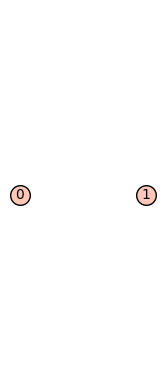

[[0, 1]]


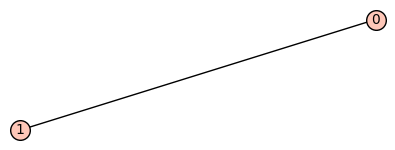

[[0], [1]]


In [3]:
# Generate graphs up to n vertices
n = 2
graphs(n)

# Show graphs
for g in graphs(n):
    
    # Show graphs
    g.show()
    
    # Get independent sets
    i = IndependentSets(g, maximal = True)
    
    # Print independent sets
    print(list(i))


### Matrices

In [4]:
# Defining matrices
M = np.matrix([[1, 2, 3], 
     [4, 5, 6],
     [7, 8, 9]])
M

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [5]:
# Zero matrices np.zeros()
x = np.zeros((3,2))
x

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [6]:
# dot products np.dot(A, B)
np.dot(M, x)

# Or, if we actually have numpy matrices (and not just arrays):
M*x

matrix([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]])

Note that the "new" Python syntax of `A@B` for matrix multiplication doesn't work because I think SageMath runs on an older version of Python.

## Experimentation

First, we're going to generate all graphs of size n, and store them in an array called `results`. For each graph `g` in `results`, its corresponding maximal independent set is stored in `indSets` at the same index.

In [475]:
# Array to hold results
results = []
indSets = []

# How many vertices?
n = 10

# Iterate through graphs
for g in graphs.nauty_geng(str(n) + "-c"):
    
    # Record the graph
    results.append(g)
    
    # Record the maximal independent set
    indSets.append(IndependentSets(g, maximal = True))

KeyboardInterrupt: 

In [476]:
len(results)

809647

### Manipulating objects within our generated data
Here I'm going to haphazardly pick a graph to use as an example.

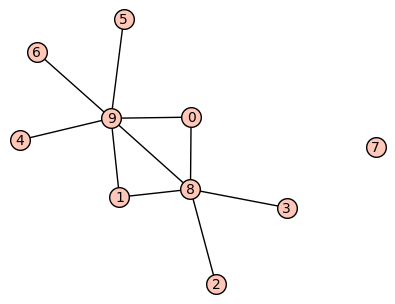

10


[[0, 1, 2, 3, 4, 5, 6, 7], [2, 3, 7, 9], [4, 5, 6, 7, 8]]

In [477]:
# which index in our results to use?
i = 122

# Show graph
results[i].show()

# How many vertices does it have?
n = len(results[i].vertices())
print n

# Print its independent set
list(indSets[i])

In [468]:
# How big is the independent set?
l = len(list(indSets[i]))
print l

# Retrieve a particular facet
list(indSets[i])[1]

5


[0, 4]

In [469]:
# Create zero matrix 
A = np.zeros((3,3))
x = np.zeros((3,1))

# If I wanted to assign a value to specific point in the matrix:
A[1,1] = A[1,1] - 1

A

array([[ 0.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  0.]])

### Construct matrix to check for solutions

In [470]:
# Grab the number of facets for graph i
t = len(list(indSets[i]))

# Grab the number of vertices
n = len(results[i].vertices())

# Prepare matrices
A = np.zeros((t-1, n))
B = np.zeros((t-1, 1))

# Iterate through all the facets of the independence complex
for j in range(0,t-1):
    
    # Grab facet j
    Fj = list(indSets[i])[j]
    
    # Grab facet j + 1
    Fj1 = list(indSets[i])[j+1]
 

    # Iterate through every vertex of the facet j
    for k in range(0, len(Fj)):
        
        # Add 1 to these spots in the matrix
        A[j, Fj[k]] = A[j, Fj[k]] + 1
       
    # Iterate through every vertex of the facet j + 1
    for k in range(0, len(Fj1)):
        
        # Subtract 1 to these spots in the matrix
        A[j, Fj1[k]] = A[j, Fj1[k]] - 1
        
    # Other side of the equation - set the j-th entry 
    B[j, 0] = len(Fj) - len(Fj1)

print A
print B

[[ 0.  0.  0.  1. -1.  0.]
 [ 1. -1. -1.  0.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  1. -1.  1.]]
[[ 0.]
 [-1.]
 [ 0.]
 [ 1.]]


## How do I check for  the existence of solutions?

Currently I have A and B in Ax = B.

Some things that might be helpful:

In [12]:
# The rank of A
np.linalg.matrix_rank(A)

3

In [13]:
# (Technical note: Change type of object to matrix over integers to use SAGE functions)
A = matrix(ZZ, A)
B = matrix(ZZ, B)


In [14]:
# Solve the equation for x
x = A.solve_right(B)
x

[2]
[2]
[0]
[0]
[0]
[0]

In [15]:
# Check that our solution works

np.dot(A, x)== B

array([[ True],
       [ True],
       [ True]], dtype=bool)

In [16]:
# Alternative syntax for solving for x in Ax = B
A\B

[2]
[2]
[0]
[0]
[0]
[0]

In [17]:
# Reduce to row echelon form
A.echelon_form()

[ 1  0  0  1 -1  1]
[ 0  1  0  1 -1  1]
[ 0  0  1 -1  0  0]

In [18]:
# Alternate syntax for row echelon form
A.rref()

[ 1  0  0  1 -1  1]
[ 0  1  0  1 -1  1]
[ 0  0  1 -1  0  0]

In [19]:
# Construct augmented matrix
C = np.concatenate((A,B), axis = 1)
C = matrix(ZZ, C)

A = matrix(ZZ,A)

# This gives the solution space to the homogeneous system
bas = transpose(A).kernel().basis()

## Technical Note: we're taking the kernel of the transpose because Sage by default takes the "left" kernel,
## and we want the right kernel (for the one-to-one correspondence between solutions to the specific system &
## solutions to the homog. system)


bas = matrix(bas)

print bas

print bas.gram_schmidt()[0]
print bas.gram_schmidt()[1]

[ 1  1  0  0  0 -1]
[ 0  0  1  1  0 -1]
[ 0  0  0  0  1  1]
[   1    1    0    0    0   -1]
[-1/3 -1/3    1    1    0 -2/3]
[ 1/4  1/4  1/4  1/4    1  1/2]
[   1    0    0]
[ 1/3    1    0]
[-1/3 -1/4    1]


## Applying Dines (1926)

### Checking for mixed signs
The first step is to check that all the rows have mixed coefficient signs (otherwise a positive solution is impossible)

In [53]:
for r in A.rows():
    print r
    print sum(r)
    print sum(x == 0 for x in r)

(1, -1, -1, 1, 0, 0)
0
2
(0, 0, 1, -1, 0, 0)
0
4
(0, 1, 0, 1, -1, 1)
2
2


In [76]:
def is_mixed(r):
    return (sum(abs(x) for x in r) != abs(sum(r))) | (sum(abs(x) for x in r) == 0)

The is_mixed(r) function returns True if the elements of r have mixed signs. It works by checking whether the sum of the absolute value of the elements of r equals the absolute value of the sum. It returns True if they are not equal (indicating that there are negative and positive elements in r). 

is_mixed(r) also returns True if all the elements in r are zero.

Here we can test the function on some examples:

In [81]:
print is_mixed([0, 1, -1])

print is_mixed([1, 1, 1])

print is_mixed([0, 0, 0])

True
False
True


Now we move on to actually checking matrices:

In [83]:
for row in A:
    print is_mixed(row)


True
True
True


If at any point, any of the rows do not read True, then a positive solution is impossible.

### Reduction from m equations to m-1 equations



First, a function to figure out which terms are positive and which are negative in the first equation

In [101]:
def separate_sign(r):
    # pos to hold positive indices
    pos = []
    
    # neg to hold negative indices
    neg = []
    
    # Sequence along 
    for i in range(0, len(r)):
        
        # If positive, add the index 
        if r[i] >= 0:
            pos.append(i)
        elif r[i] < 0:
            neg.append(i)
            
    return [pos, neg]

In [202]:
print A[0]

separate_sign(A[0])

(1, -1, -1, 1, 0, 0)


[[0, 3, 4, 5], [1, 2]]

Now, rewrite the equations:

(this corresponds to the rewrite in equation (2) and (3) on page 387 of Dines)

In [221]:
# r is the vector of coefficients
# p is a list of positive indices from row 1
# n is a list of negative indices from row 1

# Function to rewrite the first line of the matrix (i.e. (2) in Dines)
def rewrite_eq_1(r):
    # Get indices for positive and negative coefficients
    po = separate_sign(r)[0]
    ne = separate_sign(r)[1]

    # Prepare lists
    lhs = list(np.zeros((1, len(r))))
    rhs = list(np.zeros((1, len(r))))
    
    for i in po:
        lhs[0][i] = r[i]
        
    for j in ne:
        rhs[0][j] = -r[j]
    
    return [lhs, rhs]
        
# Function to rewrite all the other lines of the matrix
def rewrite_eq_r(r, po, ne):
    
    # Generate a zero vector of the correct length to store coefficients
    # Need to list these in order to index them properly later, not sure why
    # So in fact, rhs and lhs are arrays inside of lists
    # Therefore need to index them like rhs[0][i] to actually acesss the i^th element
    
    lhs = list(np.zeros((1, len(r))))
    rhs = list(np.zeros((1, len(r))))
    
    for i in po:
        rhs[0][i] = -r[i]
        
    for j in ne:
        lhs[0][j] = r[j]

    return [lhs, rhs]

A quick test of our function:

In [232]:
# Positive indices
p = separate_sign(A[0])[0]

# Negative indices
n = separate_sign(A[0])[1]

# Print original matrix
print A

# Print original line 1
print A[0]

# Split line 1 according to eq (2)
print rewrite_eq_1(A[0])

# Print original line 2
print A[1]

# Split line 2 according to eq(3)
print rewrite_eq_r(A[1],p, n)

[ 1 -1 -1  1  0  0]
[ 0  0  1 -1  0  0]
[ 0  1  0  1 -1  1]
(1, -1, -1, 1, 0, 0)
[[array([ 1.,  0.,  0.,  1.,  0.,  0.])], [array([ 0.,  1.,  1.,  0.,  0.,  0.])]]
(0, 0, 1, -1, 0, 0)
[[array([ 0.,  0.,  1.,  0.,  0.,  0.])], [array([ 0.,  0.,  0.,  1.,  0.,  0.])]]


Now, use the functions to rewrite the equations:

In [245]:
lhs1 = rewrite_eq_1(A[0])[0][0]
lhs2 = rewrite_eq_r(A[1],p, n)[0][0]

print lhs1
print lhs2

L = np.zeros((A.ncols(), A.ncols()))
R = np.zeros((A.ncols(), A.ncols()))

print L

for i in range(len(lhs1)):
    L[i] = lhs1[i]*lhs2

[ 1.  0.  0.  1.  0.  0.]
[ 0.  0.  1.  0.  0.  0.]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [246]:
L

array([[ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In this array, L[i,j] refers to the coefficient in front of $x_{ij}$

I'm going to use this method for the matrix in Dines to make sure it works:

In [253]:
D = np.matrix([[1, -1, 1, 1, 1, -1, -1, -1], 
     [1, 2, -1, 2, -1, 2, -1, -2],
     [1, 2, 3, -4, -5, -6, 7, -8]])

D = matrix(ZZ, D)
# Eventually I'll find a way to make this more efficient...

D

[ 1 -1  1  1  1 -1 -1 -1]
[ 1  2 -1  2 -1  2 -1 -2]
[ 1  2  3 -4 -5 -6  7 -8]

In [273]:
lhs = []
rhs = []

# Store the positive indices
p = separate_sign(D[0])[0]

# Store the negative indices
n = separate_sign(D[0])[1]

# Store each side of equation 1
lhs.append(rewrite_eq_1(D[0])[0][0])
rhs.append(rewrite_eq_1(D[0])[1][0])

# Store each side of equation 2
lhs.append(rewrite_eq_r(D[1], p, n)[0][0])
rhs.append(rewrite_eq_r(D[1], p, n)[1][0])

# Store each side of equation 3
lhs.append(rewrite_eq_r(D[2], p, n)[0][0])
rhs.append(rewrite_eq_r(D[2], p, n)[1][0])

# Check that everything is consistent with the paper
print "The left-hand sides for eqs. 1 to 3:"
for i in lhs:
    print i

print "The right-hand sides for eqs. 1 to 3:"
for i in rhs:
    print i

The left-hand sides:
[ 1.  0.  1.  1.  1.  0.  0.  0.]
[ 0.  2.  0.  0.  0.  2. -1. -2.]
[ 0.  2.  0.  0.  0. -6.  7. -8.]
The right-hand sides:
[ 0.  1.  0.  0.  0.  1.  1.  1.]
[-1.  0.  1. -2.  1.  0.  0.  0.]
[-1.  0. -3.  4.  5.  0.  0.  0.]


Now we form the new equations as per the end of page 389:

In [297]:
L = []
R = []

# Multiply the left-hand sides
for r in range(1,len(lhs)):
    L.append(np.zeros((D.ncols(), D.ncols())))
    
    for i in range(len(lhs[0])):
        L[r-1][i] = (lhs[0][i])*lhs[r]

# Multiply the right-hand sides
for r in range(1, len(rhs)):
    R.append(np.zeros((D.ncols(), D.ncols())))
    
    for i in range(len(rhs[0])):
        R[r-1][i] = (rhs[0][i]*rhs[r])

In [296]:
L

[array([[ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.]]),
 array([[ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.],
        [ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.]])]

In [304]:
print transpose(R[0])
print transpose(R[1])

[[-0. -1. -0. -0. -0. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  1.  1.]
 [-0. -2. -0. -0. -0. -2. -2. -2.]
 [ 0.  1.  0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[-0. -1. -0. -0. -0. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [-0. -3. -0. -0. -0. -3. -3. -3.]
 [ 0.  4.  0.  0.  0.  4.  4.  4.]
 [ 0.  5.  0.  0.  0.  5.  5.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [318]:
# Now, construct a new system
D_new = []

for i in range(len(L)):
    D_new.append(np.ravel(L[i] - transpose(R[i])))

In [319]:
D_new

[array([ 0.,  3.,  0.,  0.,  0.,  3.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         0., -0., -0.,  0.,  1.,  0.,  0.,  0.,  1., -2., -3.,  0.,  4.,
         0.,  0.,  0.,  4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1., -2.,
        -3.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.]),
 array([  0.,   3.,   0.,   0.,   0.,  -5.,   8.,  -7.,   0.,   0.,   0.,
          0.,   0.,  -0.,   0.,  -0.,   0.,   5.,   0.,   0.,   0.,  -3.,
         10.,  -5.,   0.,  -2.,   0.,   0.,   0., -10.,   3., -12.,   0.,
         -3.,   0.,   0.,   0., -11.,   2., -13.,   0.,   0.,   0.,   0.,
          0.,  -0.,   0.,  -0.,   0.,   0.,   0.,   0.,   0.,  -0.,   0.,
         -0.,   0.,   0.,   0.,   0.,   0.,  -0.,   0.,  -0.])]

In [322]:
print is_mixed(D_new[0])
print is_mixed(D_new[1])

True
True


## Putting the positive solution algorithm together

Here, I want to be able make a function that takes an initial matrix of coefficients (for a homoegenous system) and applies the algorithm to return True if positive solutions exist, or False if no positive solutions exist.

In [447]:
def Dines_check(M):
    
    for N in range(0, M.nrows()):
        
        # If there are rows of the matrix that are not mixed, then no positive solutions exist -----------------
        if (sum(is_mixed(r) for r in M)) < M.nrows():
            return False
            done = True
            
        # Otherwise, need to reduce the matrix: -------------------------------------------------------
        elif (sum(is_mixed(r) for r in M)) == M.nrows():

            # First, some setup ----------------------
            # Empty lists to store the re-written equations
            lhs = []
            rhs = []

            # Empty lists to store the multiplied system
            L = []
            R = []

            # Empty list to store the completely new system
            M_new = []

            # Store the positive indices of the first equation
            p = separate_sign(M[0])[0]

            # Store the negative indices first equation
            n = separate_sign(M[0])[1]

            # Store each side of equation 1 -----------------
            lhs.append(rewrite_eq_1(M[0])[0][0])
            rhs.append(rewrite_eq_1(M[0])[1][0])

            # Store each side of equation 2 to m -------------------
            for q in range(1,(M.nrows())):

                lhs.append(rewrite_eq_r(M[q], p, n)[0][0])
                rhs.append(rewrite_eq_r(M[q], p, n)[1][0])

            # Form the new equations -------------------
            # Multiply the left hand side
            for s in range(1,len(lhs)):
                L.append(np.zeros((M.ncols(), M.ncols())))

                for t in range(len(lhs[0])):
                    L[s-1][t] = (lhs[0][t])*lhs[s]

            # Multiply the right hand side
            for s in range(1, len(rhs)):
                R.append(np.zeros((M.ncols(), M.ncols())))

                for t in range(len(rhs[0])):
                    R[s-1][t] = (rhs[0][t]*rhs[s])

            # Bring everything back to the left hand side ----------------
            for s in range(len(L)):
                M_new.append(np.ravel(L[s] - transpose(R[s])))

            # return M_new ## For troubleshooting
            # Check whether we pass ----------------------------------
            if (len(M_new) == 1):                
                if is_mixed(M_new[0]):
                    return True
                else: 
                    return False
            else:
                M = matrix(np.matrix(M_new))
                




In [448]:
sum(is_mixed(r) for r in A) == A.nrows()

True

In [450]:
T = matrix([[1, -2, 3], 
     [4, 5, -6],
     [7, 8, -9]])

print T.nrows()
Dines_check(D)





3


True

In [367]:
L

[array([[ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  2.,  0.,  0.,  0.,  2., -1., -2.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -0., -0.]]),
 array([[ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.],
        [ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  2.,  0.,  0.,  0., -6.,  7., -8.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.],
        [ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.]])]

In [431]:
matrix(ZZ, M_new[0])

IndexError: tuple index out of range

In [432]:
M = D

lhs = []
rhs = []

# Empty lists to store the multiplied system
L = []
R = []

# Empty list to store the completely new system
M_new = []

# Store the positive indices of the first equation
p = separate_sign(M[0])[0]

# Store the negative indices first equation
n = separate_sign(M[0])[1]

# Store each side of equation 1 -----------------
lhs.append(rewrite_eq_1(M[0])[0][0])
rhs.append(rewrite_eq_1(M[0])[1][0])

# Store each side of equation 2 to m -------------------
for q in range(1,M.nrows()):

    lhs.append(rewrite_eq_r(M[q], p, n)[0][0])
    rhs.append(rewrite_eq_r(M[q], p, n)[1][0])

# Form the new equations -------------------
# Multiply the left hand side
for s in range(1,len(lhs)):
    L.append(np.zeros((M.ncols(), M.ncols())))

    for t in range(len(lhs[0])):
        L[s-1][t] = (lhs[0][t])*lhs[s]

# Multiply the right hand side
for s in range(1, len(rhs)):
    R.append(np.zeros((M.ncols(), M.ncols())))

    for t in range(len(rhs[0])):
        R[s-1][t] = (rhs[0][t]*rhs[s])

# Bring everything back to the left hand side ----------------
for s in range(len(L)):
    M_new.append(np.ravel(L[s] - transpose(R[s])))

In [452]:
print T
Dines_check(T)

[ 1 -2  3]
[ 4  5 -6]
[ 7  8 -9]


False

In [453]:
print D
Dines_check(D)

[ 1 -1  1  1  1 -1 -1 -1]
[ 1  2 -1  2 -1  2 -1 -2]
[ 1  2  3 -4 -5 -6  7 -8]


True

In [455]:
print A
Dines_check(A)

[ 1 -1 -1  1  0  0]
[ 0  0  1 -1  0  0]
[ 0  1  0  1 -1  1]


True

## Derrick Stole Math 482 Linear programming
https://faculty.math.illinois.edu/~stolee/482/examples/sageexample.pdf


In [461]:
p = MixedIntegerLinearProgram(maximization=False, solver="GLPK");
w = p.new_variable();

for i in range(6):
    p.set_min(w[i], 0);
    p.set_integer(w[i]);
w

p.add_constraint(w[0] + w[3] + w[5] - w[1] -w[2] -w[3] == 0 );

p.add_constraint(w[1] + w[2] + w[3] - w[1] -w[3] -w[5] == 0 );

p.add_constraint(w[1] + w[3] + w[5] - w[4] == 2 );

p.add_constraint(w[0] >=2) ;
p.add_constraint(w[1] >=2) ;
p.add_constraint(w[2] >=2) ;
p.add_constraint(w[3] >=2) ;
p.add_constraint(w[4] >=2) ;
p.add_constraint(w[5] >=2) ;

p.set_objective(w[0] + w[1]+ w[2] + w[3] + w[4] + w[5]);

p.show();

Minimization:
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5 

Constraints:
  0.0 <= x_0 - x_1 - x_2 + x_5 <= 0.0
  0.0 <= x_2 - x_5 <= 0.0
  2.0 <= x_1 + x_3 - x_4 + x_5 <= 2.0
  - x_0 <= -2.0
  - x_1 <= -2.0
  - x_2 <= -2.0
  - x_3 <= -2.0
  - x_4 <= -2.0
  - x_5 <= -2.0
Variables:
  x_0 is an integer variable (min=0.0, max=+oo)
  x_1 is an integer variable (min=0.0, max=+oo)
  x_2 is an integer variable (min=0.0, max=+oo)
  x_3 is an integer variable (min=0.0, max=+oo)
  x_4 is an integer variable (min=0.0, max=+oo)
  x_5 is an integer variable (min=0.0, max=+oo)


In [463]:
p.solve()

14.0

In [466]:
p.get_values([w[i] for i in range(6)])

[2.0, 2.0, 2.0, 2.0, 4.0, 2.0]

In [3]:
i = 0
j = 0
k = 0
l = 0
m = 0
n = 0

for g in graphs.nauty_geng("6 -c 0/6"):
    i = i+1

for g in graphs.nauty_geng("6 -c 1/6"):
    j = j + 1
    
for g in graphs.nauty_geng("6 -c 2/6"):
    k = k + 1
    
for g in graphs.nauty_geng("6 -c 3/6"):
    l = l + 1

for g in graphs.nauty_geng("6 -c 4/6"):
    m = m + 1  
    
for g in graphs.nauty_geng("6 -c 5/6"):
    n = n + 1


print i, j, k, l, m, n

sum((i, j, k, l, m, n))

75 29 7 1 0 0


112